In [ ]:
# Importing of general libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

2023-04-18 15:30:44.374036: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 15:30:44.611066: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 15:30:44.613139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 15:30:46.079331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Importing libraries
import tensorflow.keras.backend as K
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier


from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras import backend as k
from tensorflow.keras.utils import to_categorical

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(
    'Hiragan_test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training')
val_dataset = train_datagen.flow_from_directory(
    'Hiragan_test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


FileNotFoundError: [Errno 2] No such file or directory: 'Hiragan_test'

Number of classes: 5


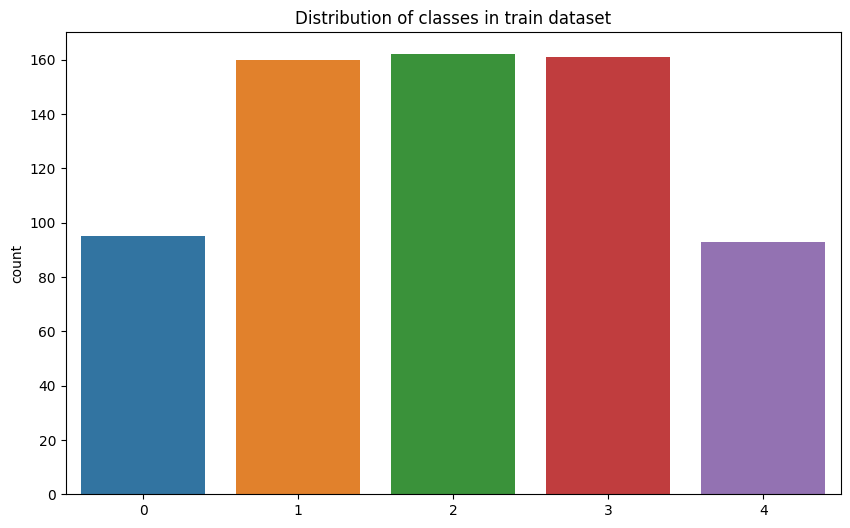

In [ ]:
# Number of classes
num_classes = len(train_dataset.class_indices)
print("Number of classes:", num_classes)

# Countplot of train_dataset
plt.figure(figsize=(10,6))
sns.countplot(x=train_dataset.classes)
plt.title("Distribution of classes in train dataset")
plt.show()

In [ ]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


2023-04-16 11:04:48.237609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-16 11:04:48.238099: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
# Train the model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=40)

# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_dataset = test_datagen.flow_from_directory(
    'Hiragan_test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical')
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

Epoch 1/40


2023-04-16 11:04:48.512773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


21/21 [==============================] - 1s 26ms/step - loss: 1.2884 - accuracy: 0.5037 - val_loss: 0.7070 - val_accuracy: 0.7831
Epoch 2/40


2023-04-16 11:04:49.514367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


21/21 [==============================] - 0s 18ms/step - loss: 0.4783 - accuracy: 0.8554 - val_loss: 0.3000 - val_accuracy: 0.9036
Epoch 3/40
21/21 [==============================] - 0s 20ms/step - loss: 0.2638 - accuracy: 0.9091 - val_loss: 0.2454 - val_accuracy: 0.8855
Epoch 4/40
21/21 [==============================] - 0s 17ms/step - loss: 0.1976 - accuracy: 0.9255 - val_loss: 0.2422 - val_accuracy: 0.9337
Epoch 5/40
21/21 [==============================] - 0s 16ms/step - loss: 0.1390 - accuracy: 0.9613 - val_loss: 0.1695 - val_accuracy: 0.9398
Epoch 6/40
21/21 [==============================] - 0s 17ms/step - loss: 0.0822 - accuracy: 0.9836 - val_loss: 0.2062 - val_accuracy: 0.9398
Epoch 7/40
21/21 [==============================] - 0s 18ms/step - loss: 0.0988 - accuracy: 0.9627 - val_loss: 0.2022 - val_accuracy: 0.9398
Epoch 8/40
21/21 [==============================] - 0s 18ms/step - loss: 0.0584 - accuracy: 0.9836 - val_loss: 0.1678 - val_accuracy: 0.9458
Epoch 9/40
21/21 [======

2023-04-16 11:05:04.504063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


27/27 [==============================] - 0s 9ms/step - loss: 0.0439 - accuracy: 0.9940
Test accuracy: 0.9940263032913208


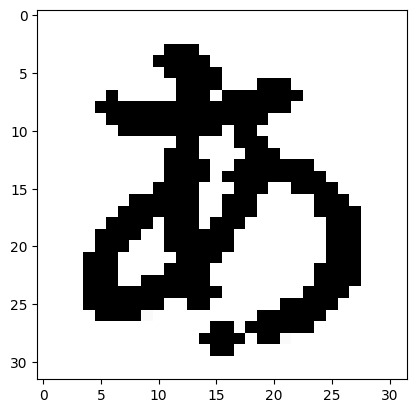

Class names: ['あ', 'い', 'う', 'え', 'お']
1/1 [==============================] - 0s 79ms/step
Predicted label: あ


In [ ]:
from PIL import Image

img = Image.open('Hiragana_letter_A.png')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
# Morphological filtering
from skimage.morphology import opening
from skimage.morphology import disk
# Connected component filtering
import cv2
# Data handling
import numpy as np

test_datagen = ImageDataGenerator(rescale=1./255)

# Convert image to RGB mode
img = img.convert('RGB')
img = img.resize((32, 32))

black = 0
white = 255
threshold = 250

# Load the image
pixels = np.array(img)[:,:,0]

# Apply the thresholding
pixels[pixels > threshold] = white
pixels[pixels < threshold] = black

# Morphological opening
blobSize = 1 # Select the maximum radius of the blobs you would like to remove
structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
# We need to invert the image such that black is background and white foreground to perform the opening
pixels = np.invert(opening(np.invert(pixels), structureElement))

newImg = Image.fromarray(pixels).convert('RGB')
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)

plt.imshow(newImg)
plt.show()
img_array = np.array(newImg)
img_array = np.expand_dims(img_array, axis=0)
img_array = test_datagen.flow(img_array).next()

import os

# Get the class names
class_names = sorted(os.listdir('Hiragan_test'))
print("Class names:", class_names)

prediction = model.predict(img_array)
predicted_label = class_names[np.argmax(prediction)]

print("Predicted label:", predicted_label)

In [ ]:
plt.figure(figsize = (5,9))
pred = model.predict(test_dataset)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_dataset, axis=1)
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = class_names, yticklabels = class_names)

13/27 [=============>................] - ETA: 0s

2023-04-16 11:09:58.325812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


27/27 [==============================] - 0s 10ms/step


KeyboardInterrupt: 

<Figure size 500x900 with 0 Axes>